<a href="https://colab.research.google.com/github/Ifusa/Autoencoders-tensorflow/blob/main/basic_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#importing libraries
import tensorflow as tf
from matplotlib import pyplot as plt

In [39]:
#loading mnist data
mnist = tf.keras.datasets.mnist
(training_x,_), (testing_x,_) = mnist.load_data()

In [40]:
#checking the shape of data
print(training_x.shape)
print(testing_x.shape)

(60000, 28, 28)
(10000, 28, 28)


In [78]:
#defining callback class. Will stop training when loss becomes less or equal to 0.0045
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss') <= 0.0045):
      print("\nReached desired loss, Terminating training....\n")
      self.model.stop_training = True

In [71]:
#creating instance
callbacks = mycallback()

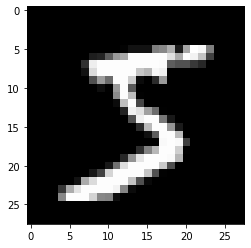

In [43]:
#visualising data image
plt.imshow(training_x[0], cmap='gray')
plt.show()

In [44]:
#normalizing data
training_x = training_x/255.0
testing_x = testing_x/255.0

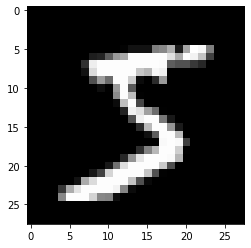

In [45]:
#visualizing data again after normalization
plt.imshow(training_x[0], cmap='gray')
plt.show()

In [133]:
#defining architecture
latent_size = 32
encoder = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(latent_size, activation=tf.nn.relu6)
])
decoder = tf.keras.models.Sequential([         
  tf.keras.layers.Dense(256, activation=tf.nn.relu6),                       
  tf.keras.layers.Dense(784, activation='sigmoid'),
  tf.keras.layers.Reshape((28, 28))
])

img = tf.keras.layers.Input(shape = (28, 28))
l_vector = encoder(img)
output = decoder(l_vector)

model = tf.keras.Model(inputs= img, outputs= output)
#compiling the model
model.compile(optimizer='adam', loss=tf.losses.MeanSquaredError())

In [134]:
#training the model
history = model.fit(training_x, training_x, epochs=10, shuffle= True, callbacks=[callbacks], validation_data=(testing_x, testing_x))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0226 - val_loss: 0.0115
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0109 - val_loss: 0.0099
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0095 - val_loss: 0.0087
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0086 - val_loss: 0.0081
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0080 - val_loss: 0.0077
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0076 - val_loss: 0.0073
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0069 - val_loss: 0.0068
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.006

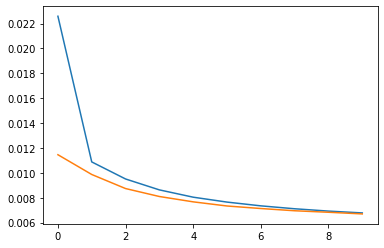

In [135]:
#visualizing training process
#print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

# Testing images on our trained model and plotting them

In [136]:

enc_img = encoder(testing_x).numpy()
dec_img = decoder(enc_img).numpy()

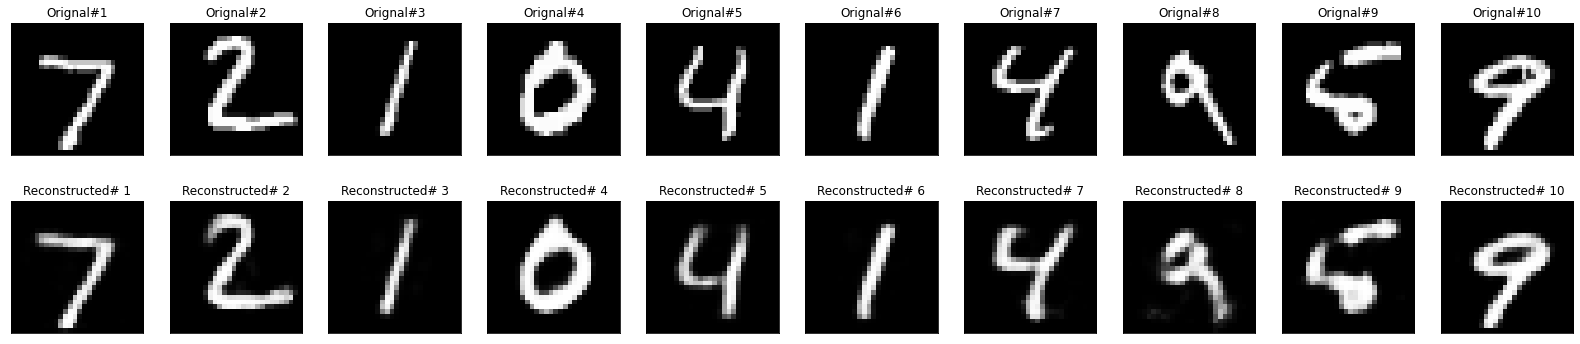

In [137]:
n=10
plt.figure(figsize=(28,6))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(testing_x[i])
  plt.title("Orignal#"+str(i+1))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(dec_img[i])
  plt.title("Reconstructed# "+str(i+1))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


plt.show()

  